In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(
        'https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031/download/sid_dav_verkehrszaehlung_miv_OD2031_2024.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653197 entries, 0 to 653196
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSID                653197 non-null  object 
 1   MSName              653197 non-null  object 
 2   ZSID                653197 non-null  object 
 3   ZSName              653197 non-null  object 
 4   Achse               653197 non-null  object 
 5   HNr                 653197 non-null  object 
 6   Hoehe               653197 non-null  object 
 7   EKoord              653197 non-null  float64
 8   NKoord              653197 non-null  float64
 9   Richtung            653197 non-null  object 
 10  Knummer             653197 non-null  int64  
 11  Kname               653197 non-null  object 
 12  AnzDetektoren       653197 non-null  int64  
 13  D1ID                653197 non-null  int64  
 14  D2ID                653197 non-null  object 
 15  D3ID                653197 non-nul

for more on variables see <https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031#dataset>

## stations

In [6]:
# number of stations
df.MSID.nunique()

203

In [14]:
# stations seperately
df_stations = df.copy().drop_duplicates('MSID')
df_stations.drop(['MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus'], axis=1, inplace=True)
df_stations

,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,Knummer,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID
0,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.890,1243936.200,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt
3239,Z001M002,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683013.180,1243937.640,einwärts,789,Badanstalt Wollishofen,1,1,Unbekannt,Unbekannt,Unbekannt
6478,Z002M001,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,2682480.510,1243162.500,auswärts,679,Albis-/Paradies-/Widmerstr (Schulweg),1,13,Unbekannt,Unbekannt,Unbekannt
9717,Z002M002,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,2682484.910,1243162.410,einwärts,679,Albis-/Paradies-/Widmerstr (Schulweg),1,14,Unbekannt,Unbekannt,Unbekannt
12956,Z003M001,Unbekannt,Z003,Sood-/Leimbachstrasse,Soodstrasse,Unbekannt,Leimbachstrasse,2681573.790,1242969.910,auswärts,669,Leimbach-/Soodstr,1,16,Unbekannt,Unbekannt,Unbekannt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641322,Z106M001,Unbekannt,Z106,Zürichbergstrasse (Dreiwiesenstrasse),Zürichbergstrasse,Unbekannt,Wendeschlaufe Zoo,2685564.753,1248487.685,Zoo,560,Dreiwiesen-/Krähbühlstr (Wechselsignal-Steueru...,1,1,Unbekannt,Unbekannt,Unbekannt
643121,Z106M002,Unbekannt,Z106,Zürichbergstrasse (Dreiwiesenstrasse),Zürichbergstrasse,Unbekannt,Wendeschlaufe Zoo,2685565.376,1248500.950,einwärts,560,Dreiwiesen-/Krähbühlstr (Wechselsignal-Steueru...,1,2,Unbekannt,Unbekannt,Unbekannt
644920,Z107M003,Unbekannt,Z107,Dreiwiesenstrasse (Tobelhofstrasse),Dreiwiesenstrasse,Unbekannt,vor Tobelhofstrasse,2685813.765,1248154.018,auswärts,550,Tobelhof-/Dreiwiesenstrasse,1,30,Unbekannt,Unbekannt,Unbekannt
646719,Z107M004,Unbekannt,Z107,Dreiwiesenstrasse (Tobelhofstrasse),Dreiwiesenstrasse,Unbekannt,nach Tobelhofstrasse,2685812.581,1248158.685,Zoo,550,Tobelhof-/Dreiwiesenstrasse,1,18,Unbekannt,Unbekannt,Unbekannt


## traffic flow

In [16]:
# keep only subset to save memory
df = df[['MSID', 'MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653197 entries, 0 to 653196
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   MSID                653197 non-null  object 
 1   MessungDatZeit      653197 non-null  object 
 2   LieferDat           653197 non-null  object 
 3   AnzFahrzeuge        613278 non-null  float64
 4   AnzFahrzeugeStatus  653197 non-null  object 
dtypes: float64(1), object(4)
memory usage: 24.9+ MB


In [41]:
df.loc[:,'MessungDatZeit'] = pd.to_datetime(df.MessungDatZeit, format='ISO8601')

In [42]:
# latest measurement
df.MessungDatZeit.max()

Timestamp('2024-05-14 23:00:00')

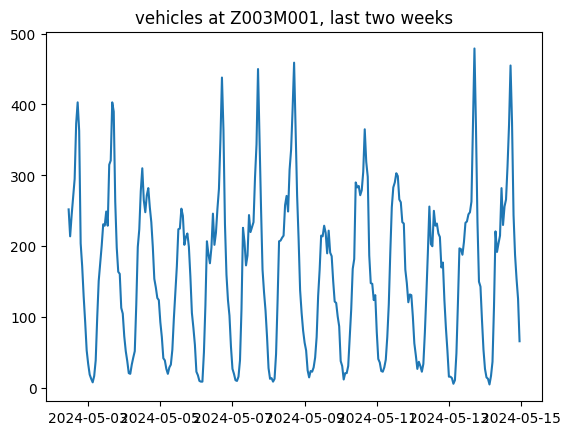

In [49]:
import matplotlib.pyplot as plt
import datetime 

STATION_ID = 'Z003M001' 
TIME_LIMIT = datetime.datetime.now() - datetime.timedelta(days = 14)

# plot one station
df_plot = df.loc[df.MSID == STATION_ID, :]
df_plot = df_plot[df_plot.MessungDatZeit > TIME_LIMIT]

plt.plot(df_plot.MessungDatZeit, df_plot.AnzFahrzeuge)
plt.title(f'vehicles at {STATION_ID}, last two weeks');

## prepare import

In [50]:
df = pd.read_csv(
        'https://data.stadt-zuerich.ch/dataset/sid_dav_verkehrszaehlung_miv_od2031/download/sid_dav_verkehrszaehlung_miv_OD2031_2024.csv',
    usecols=['MSID', 'MessungDatZeit', 'LieferDat', 'AnzFahrzeuge',
       'AnzFahrzeugeStatus'],
    parse_dates=['MessungDatZeit']
)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653197 entries, 0 to 653196
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   MSID                653197 non-null  object        
 1   MessungDatZeit      653197 non-null  datetime64[ns]
 2   LieferDat           653197 non-null  object        
 3   AnzFahrzeuge        613278 non-null  float64       
 4   AnzFahrzeugeStatus  653197 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 24.9+ MB


In [52]:
df

,MSID,MessungDatZeit,LieferDat,AnzFahrzeuge,AnzFahrzeugeStatus
0,Z001M001,2024-01-01 00:00:00,2024-05-15,178.0,Gemessen
1,Z001M001,2024-01-01 01:00:00,2024-05-15,380.0,Gemessen
2,Z001M001,2024-01-01 02:00:00,2024-05-15,143.0,Gemessen
3,Z001M001,2024-01-01 03:00:00,2024-05-15,81.0,Gemessen
4,Z001M001,2024-01-01 04:00:00,2024-05-15,70.0,Gemessen
...,...,...,...,...,...
653192,Z108M005,2024-05-14 19:00:00,2024-05-15,280.0,Gemessen
653193,Z108M005,2024-05-14 20:00:00,2024-05-15,177.0,Gemessen
653194,Z108M005,2024-05-14 21:00:00,2024-05-15,167.0,Gemessen
653195,Z108M005,2024-05-14 22:00:00,2024-05-15,168.0,Gemessen


## export station data for the map

In [65]:
import pyproj

# Define the LV95 and WGS84 coordinate systems
lv95 = pyproj.Proj(init='epsg:2056')
wgs84 = pyproj.Proj(init='epsg:4326')

# Function to convert coordinates
def lv95_to_wgs84(df):
    lon, lat = pyproj.transform(lv95, wgs84, df['EKoord'].values, df['NKoord'].values)
    df['lon'] = lon
    df['lat'] = lat
    return df

/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/pascal/1_code/master_ids/dwdl_air-quality-traffic/venv/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [70]:
df_stations = lv95_to_wgs84(df_stations)
df_stations

/var/folders/3p/zn615dls2gv0xhj_cn94h4_h0000gn/T/ipykernel_2340/2008203937.py:9: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lon, lat = pyproj.transform(lv95, wgs84, df['EKoord'].values, df['NKoord'].values)


,MSID,MSName,ZSID,ZSName,Achse,HNr,Hoehe,EKoord,NKoord,Richtung,Knummer,Kname,AnzDetektoren,D1ID,D2ID,D3ID,D4ID,lon,lat
0,Z001M001,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683009.890,1243936.200,auswärts,789,Badanstalt Wollishofen,1,2,Unbekannt,Unbekannt,Unbekannt,8.537068,47.341059
3239,Z001M002,Unbekannt,Z001,Seestrasse (Strandbad Wollishofen),Seestrasse,451,Unbekannt,2683013.180,1243937.640,einwärts,789,Badanstalt Wollishofen,1,1,Unbekannt,Unbekannt,Unbekannt,8.537112,47.341071
6478,Z002M001,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,2682480.510,1243162.500,auswärts,679,Albis-/Paradies-/Widmerstr (Schulweg),1,13,Unbekannt,Unbekannt,Unbekannt,8.529921,47.334167
9717,Z002M002,Unbekannt,Z002,Albisstrasse (Widmerstrasse),Albisstrasse,152,Unbekannt,2682484.910,1243162.410,einwärts,679,Albis-/Paradies-/Widmerstr (Schulweg),1,14,Unbekannt,Unbekannt,Unbekannt,8.529980,47.334165
12956,Z003M001,Unbekannt,Z003,Sood-/Leimbachstrasse,Soodstrasse,Unbekannt,Leimbachstrasse,2681573.790,1242969.910,auswärts,669,Leimbach-/Soodstr,1,16,Unbekannt,Unbekannt,Unbekannt,8.517891,47.332547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641322,Z106M001,Unbekannt,Z106,Zürichbergstrasse (Dreiwiesenstrasse),Zürichbergstrasse,Unbekannt,Wendeschlaufe Zoo,2685564.753,1248487.685,Zoo,560,Dreiwiesen-/Krähbühlstr (Wechselsignal-Steueru...,1,1,Unbekannt,Unbekannt,Unbekannt,8.571741,47.381665
643121,Z106M002,Unbekannt,Z106,Zürichbergstrasse (Dreiwiesenstrasse),Zürichbergstrasse,Unbekannt,Wendeschlaufe Zoo,2685565.376,1248500.950,einwärts,560,Dreiwiesen-/Krähbühlstr (Wechselsignal-Steueru...,1,2,Unbekannt,Unbekannt,Unbekannt,8.571751,47.381784
644920,Z107M003,Unbekannt,Z107,Dreiwiesenstrasse (Tobelhofstrasse),Dreiwiesenstrasse,Unbekannt,vor Tobelhofstrasse,2685813.765,1248154.018,auswärts,550,Tobelhof-/Dreiwiesenstrasse,1,30,Unbekannt,Unbekannt,Unbekannt,8.574974,47.378632
646719,Z107M004,Unbekannt,Z107,Dreiwiesenstrasse (Tobelhofstrasse),Dreiwiesenstrasse,Unbekannt,nach Tobelhofstrasse,2685812.581,1248158.685,Zoo,550,Tobelhof-/Dreiwiesenstrasse,1,18,Unbekannt,Unbekannt,Unbekannt,8.574959,47.378674


In [71]:
df_stations.to_csv('zurich-traffic-counters.csv', index=False)

## air quality stations

In [77]:
import requests

air_quality_metadata = requests.get("https://data.stadt-zuerich.ch/dataset/ugz_luftschadstoffmessung_stundenwerte/download/uzg_ogd_metadaten.json").json()
df_air_quality = pd.DataFrame.from_dict(air_quality_metadata['Standorte'])
df_air_quality.rename(columns={'Koordinaten_WGS84_lat': 'lat', 'Koordinaten_WGS84_lng': 'lon'}, inplace=True)
df_air_quality

,ID,Name,Kurzname,Code,Koordinaten_LV95_X,Koordinaten_LV95_Y,lat,lon,Adresse,Höhe [M.ü.M.],Beschreibung
0,Zch_Stampfenbachstrasse,Zürich Stampfenbachstrasse,Stampfenbachstrasse,ZSTA,2683148,1249020,47.3868,8.5398,"Stampfenbachstrasse 144, 8006 Zürich",445,Die Messstation steht an zentraler Lage in der...
1,Zch_Schimmelstrasse,Zürich Schimmelstrasse,Schimmelstrasse,ZSIM,2681943,1247245,47.3710,8.5235,"Schimmelstrasse 21, 8003 Zürich",413,Die Messstation steht an einer städtischen Hau...
2,Zch_Rosengartenstrasse,Zürich Rosengartenstrasse,Rosengartenstrasse,ZROS,2682106,1249935,47.3952,8.5261,"Rosengartenstrasse 24, 8037 Zürich",433,Die Messstation steht an einer städtischen Hau...
3,Zch_Heubeeribüel,Zürich Heubeeribüel,Heubeeribüel,ZHEU,2685137,1248473,47.3815,8.5659,"Heubeeriweg 30, 8044 Zürich",610,Die Messstation liegt in einem Schulareal an e...
4,Zch_Rosengartenbrücke,Zürich Rosengartenbrücke,Rosengartenbrücke,NaN,1249848,2682039,47.3943,8.5253,"Rosengartenstrasse 18, 8037 Zürich",424,Die Messstation steht an einer städtischen Hau...


In [78]:
df_air_quality.to_csv('air-quality-stations.csv', index=False)

In [79]:
df_air_quality_params = pd.DataFrame.from_dict(air_quality_metadata['Parameter'])
df_air_quality_params

,ID,Name,Einheit,Beschreibung
0,CO,Kohlenmonoxid,mg/m3,Kohlenmonoxid (CO) ist ein farb- und geruchlos...
1,SO2,Schwefeldioxid,µg/m3,"Schwefeldioxid SO2 ist ein farbloses, leicht w..."
2,O3,Ozon,µg/m3,Ozon (O3) ist ein normaler Bestandteil der Atm...
3,NOx,Stickoxide,ppb,Stickoxide oder Stickstoffoxide ist ein Sammel...
4,NO,Stickstoffmonoxid,µg/m3,Stickstoffmonoxid ist ein farb- und geruchlose...
5,NO2,Stickstoffdioxid,µg/m3,Stickoxide (NOx) entstehen als unerwünschte Ne...
6,PM10,Schwebestaub PM10,µg/m3,Lungengängiger Feinstaub ist eine Mischung von...
7,PM2.5,Schwebestaub PM2.5,µg/m3,Lungengängiger Feinstaub ist eine Mischung von...
8,PN,Partikelanzahl,1/cm3,NaN
9,O3_max_h1,"Ozon, höchstes Stundenmittel",µg/m3,Höchster Ozon-Stundenmittelwert eines Tages


## map toghether

In [85]:
df_1 = df_air_quality[['ID', 'lat', 'lon']].copy()
df_1['colour'] = 'red'
df_1

,ID,lat,lon,colour
0,Zch_Stampfenbachstrasse,47.3868,8.5398,red
1,Zch_Schimmelstrasse,47.3710,8.5235,red
2,Zch_Rosengartenstrasse,47.3952,8.5261,red
3,Zch_Heubeeribüel,47.3815,8.5659,red
4,Zch_Rosengartenbrücke,47.3943,8.5253,red


In [88]:
df_2 = df_stations[['MSID', 'lat', 'lon']].copy().rename(columns={'MSID': 'ID'})
df_2['colour'] = 'green'
df_2

,ID,lat,lon,colour
0,Z001M001,47.341059,8.537068,green
3239,Z001M002,47.341071,8.537112,green
6478,Z002M001,47.334167,8.529921,green
9717,Z002M002,47.334165,8.529980,green
12956,Z003M001,47.332547,8.517891,green
...,...,...,...,...
641322,Z106M001,47.381665,8.571741,green
643121,Z106M002,47.381784,8.571751,green
644920,Z107M003,47.378632,8.574974,green
646719,Z107M004,47.378674,8.574959,green


(8.52, 8.58)

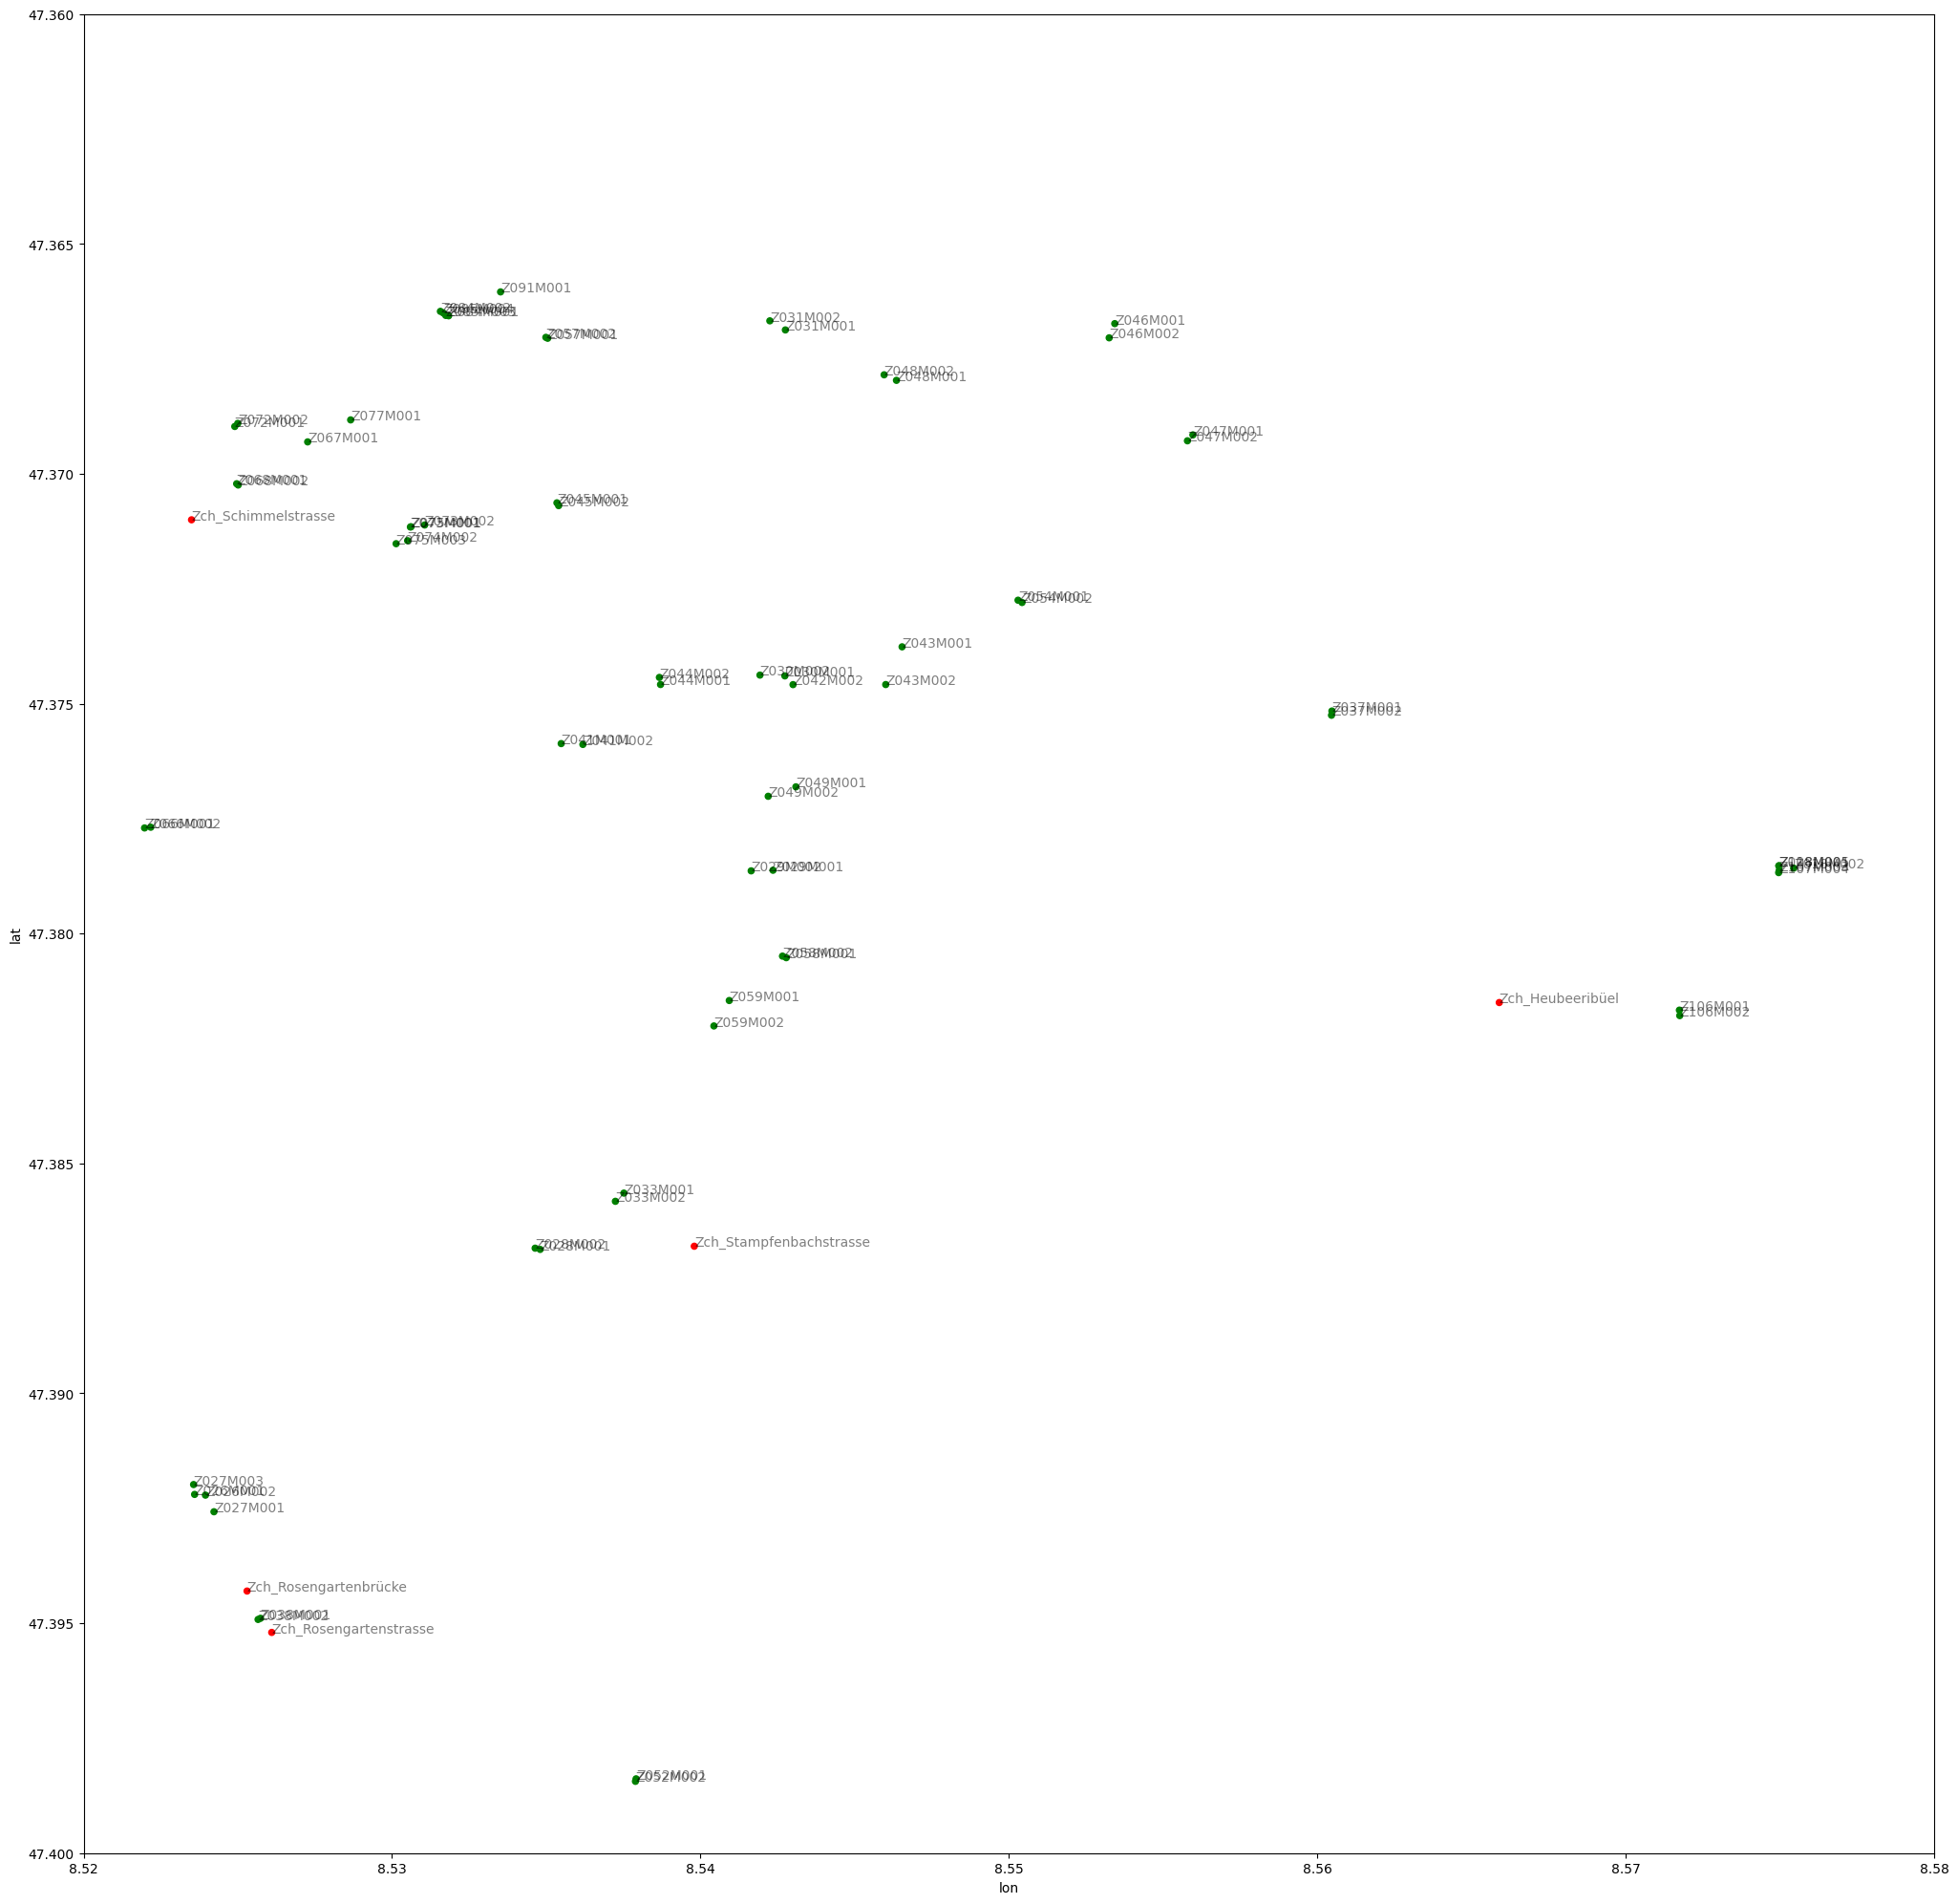

In [110]:
df_map = pd.concat([df_1, df_2], ignore_index=True)

fig, ax = plt.subplots(figsize=(25,25))
df_map.plot(x="lon", y="lat", kind="scatter", c="colour", ax=ax)
for idx, row in df_map.iterrows():
    ax.annotate(row['ID'], (row['lon'], row['lat']), alpha=0.5)

plt.ylim((47.40, 47.36))
plt.xlim((8.52, 8.58))

(8.52, 8.58)

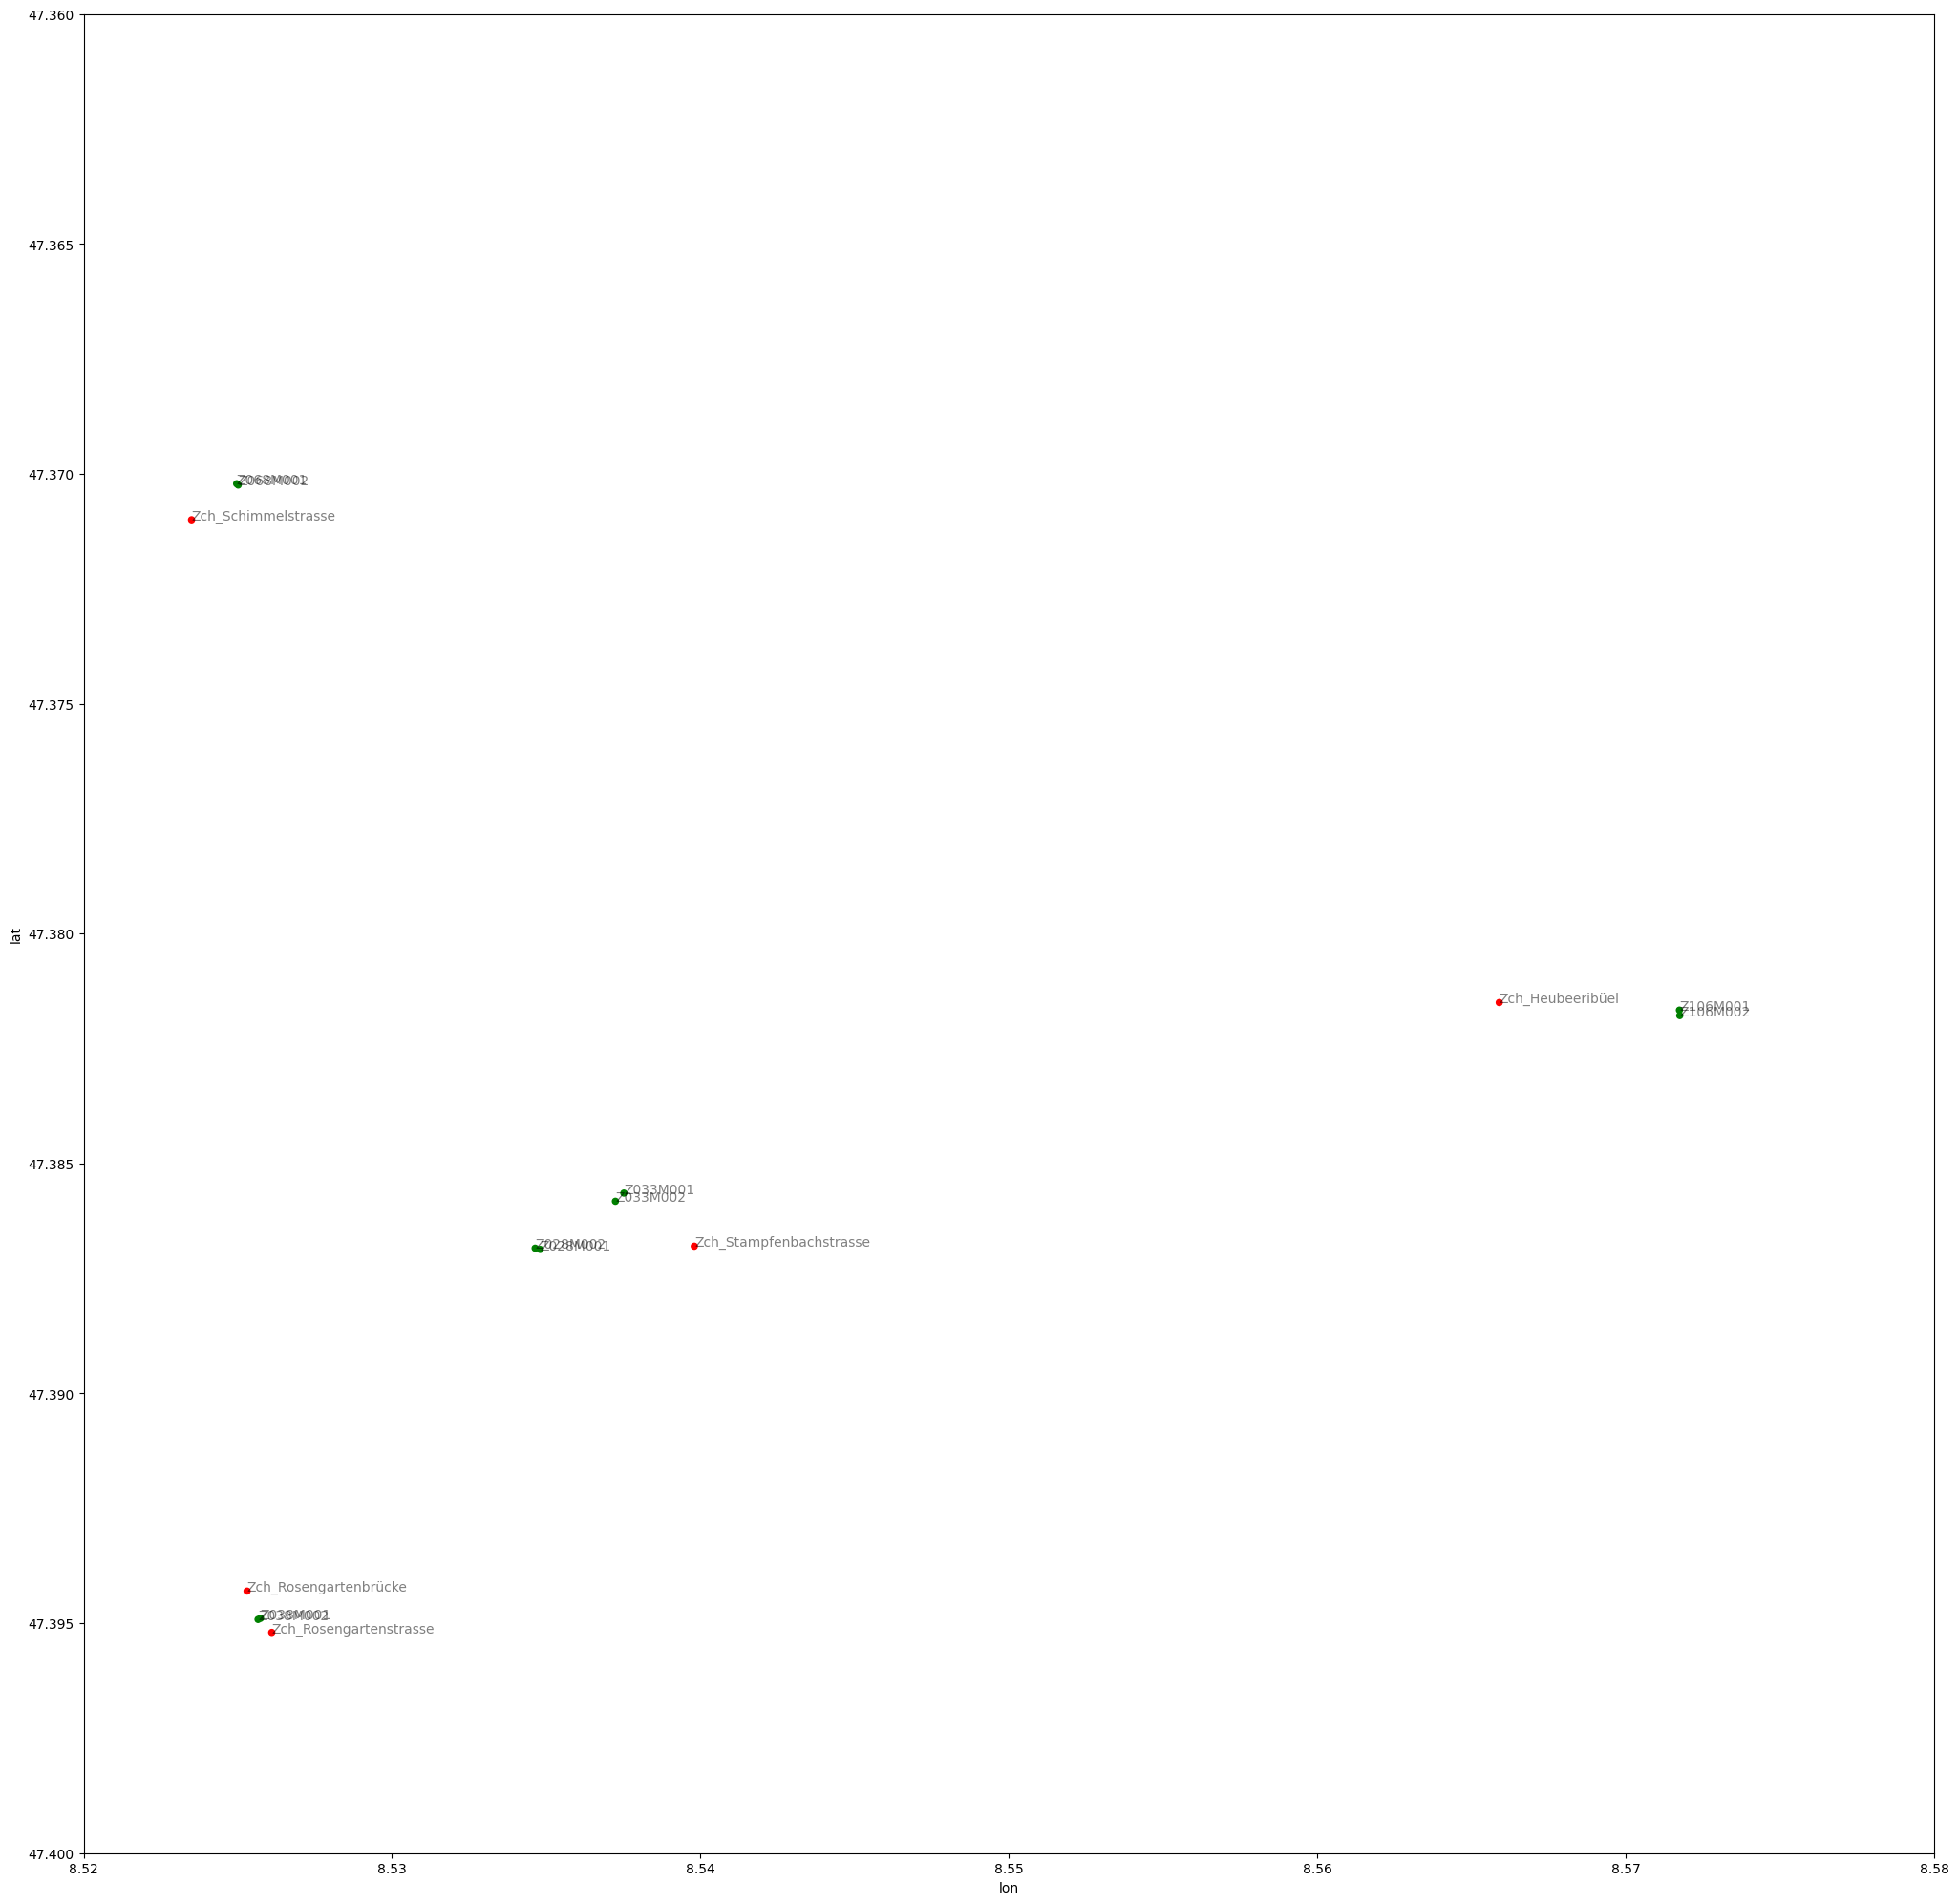

In [113]:
STATIONS = [
    'Z038M001', 'Z038M002', # Rosengarten*
    'Z033M001', 'Z033M002', 'Z028M001', 'Z028M002', # Stampfenbachstrasse
    'Z106M001', 'Z106M002', # Heubeeribüel
    'Z068M001', 'Z068M002' # Schimmelstrasse
]

df_map_sub = pd.concat([df_1, df_2.loc[df_2.ID.isin(STATIONS),:]], ignore_index=True)

fig, ax = plt.subplots(figsize=(25,25))
df_map_sub.plot(x="lon", y="lat", kind="scatter", c="colour", ax=ax)
for idx, row in df_map_sub.iterrows():
    ax.annotate(row['ID'], (row['lon'], row['lat']), alpha=0.5)

plt.ylim((47.40, 47.36))
plt.xlim((8.52, 8.58))